<a href="https://www.pieriandata.com"><img src="../Pierian_Data_Logo.PNG"></a>
<strong><center>Copyright by Pierian Data Inc.</center></strong> 
<strong><center>Created by Jose Marcial Portilla.</center></strong>

# Keras TF 2.0: Code-Along Classification Project

Let's explore a classification task with Keras API for TF 2.0.

## The Data

### Breast cancer Wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        - class:
                - WDBC-Malignant
                - WDBC-Benign

    :Summary Statistics:

    ===================================== ====== ======
                                           Min    Max
    ===================================== ====== ======
    radius (mean):                        6.981  28.11
    texture (mean):                       9.71   39.28
    perimeter (mean):                     43.79  188.5
    area (mean):                          143.5  2501.0
    smoothness (mean):                    0.053  0.163
    compactness (mean):                   0.019  0.345
    concavity (mean):                     0.0    0.427
    concave points (mean):                0.0    0.201
    symmetry (mean):                      0.106  0.304
    fractal dimension (mean):             0.05   0.097
    radius (standard error):              0.112  2.873
    texture (standard error):             0.36   4.885
    perimeter (standard error):           0.757  21.98
    area (standard error):                6.802  542.2
    smoothness (standard error):          0.002  0.031
    compactness (standard error):         0.002  0.135
    concavity (standard error):           0.0    0.396
    concave points (standard error):      0.0    0.053
    symmetry (standard error):            0.008  0.079
    fractal dimension (standard error):   0.001  0.03
    radius (worst):                       7.93   36.04
    texture (worst):                      12.02  49.54
    perimeter (worst):                    50.41  251.2
    area (worst):                         185.2  4254.0
    smoothness (worst):                   0.071  0.223
    compactness (worst):                  0.027  1.058
    concavity (worst):                    0.0    1.252
    concave points (worst):               0.0    0.291
    symmetry (worst):                     0.156  0.664
    fractal dimension (worst):            0.055  0.208
    ===================================== ====== ======

    :Missing Attribute Values: None

    :Class Distribution: 212 - Malignant, 357 - Benign

    :Creator:  Dr. William H. Wolberg, W. Nick Street, Olvi L. Mangasarian

    :Donor: Nick Street

    :Date: November, 1995

This is a copy of *UCI ML Breast Cancer Wisconsin (Diagnostic)* datasets.
https://goo.gl/U2Uwz2

Features are computed from a digitized image of a fine needle
aspirate (FNA) of a breast mass.  They describe
characteristics of the cell nuclei present in the image.

Separating plane described above was obtained using
Multisurface Method-Tree (MSM-T) [K. P. Bennett, "Decision Tree
Construction Via Linear Programming." Proceedings of the 4th
Midwest Artificial Intelligence and Cognitive Science Society,
pp. 97-101, 1992], a classification method which uses linear
programming to construct a decision tree.  Relevant features
were selected using an exhaustive search in the space of 1-4
features and 1-3 separating planes.

The actual linear program used to obtain the separating plane
in the 3-dimensional space is that described in:
[K. P. Bennett and O. L. Mangasarian: "Robust Linear
Programming Discrimination of Two Linearly Inseparable Sets",
Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server:

ftp ftp.cs.wisc.edu
cd math-prog/cpo-dataset/machine-learn/WDBC/

.. topic:: References

   - W.N. Street, W.H. Wolberg and O.L. Mangasarian. Nuclear feature extraction 
     for breast tumor diagnosis. IS&T/SPIE 1993 International Symposium on 
     Electronic Imaging: Science and Technology, volume 1905, pages 861-870,
     San Jose, CA, 1993.
   - O.L. Mangasarian, W.N. Street and W.H. Wolberg. Breast cancer diagnosis and 
     prognosis via linear programming. Operations Research, 43(4), pages 570-577, 
     July-August 1995.
   - W.H. Wolberg, W.N. Street, and O.L. Mangasarian. Machine learning techniques
     to diagnose breast cancer from fine-needle aspirates. Cancer Letters 77 (1994) 
     163-171.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('../DATA/cancer_classification.csv')

In [3]:
# 569 rows, 31 columns (relatively small dataset with high dimension)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [6]:
df['benign_0__mal_1'].value_counts()

1    357
0    212
Name: benign_0__mal_1, dtype: int64

In [ ]:
# Approx 100 more malign cases than benign

## EDA

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

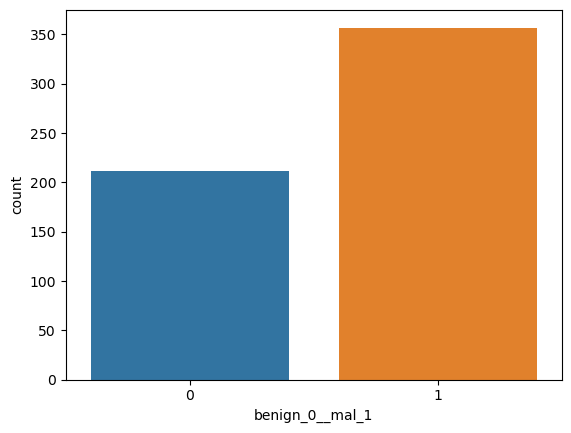

In [8]:
sns.countplot(x='benign_0__mal_1', data=df);

In [ ]:
# Looks relatively well-balanced, i.e. not too extreme! But not perfect

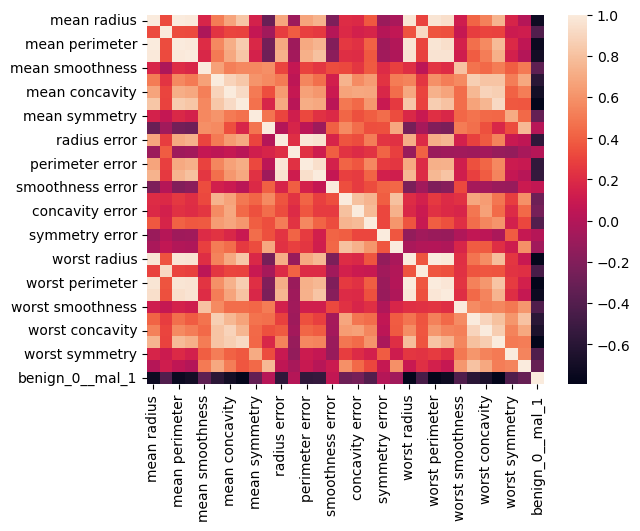

In [9]:
# Correlation between all variables

sns.heatmap(df.corr());

In [ ]:
# Appears to have more negatively correlated variables than positively correlated
# As expected, radius and perimeter values are strongly correlated because they are similar measurements

In [10]:
# Correlation between features and target variable

df.corr()['benign_0__mal_1'].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

In [ ]:
# There are no positively-correlated variables with the target variable
# Concave points and Worst measurements are most negatively-correlated with target variable
# Assume that if most feature measurements increase, more likely to be benign tumour...

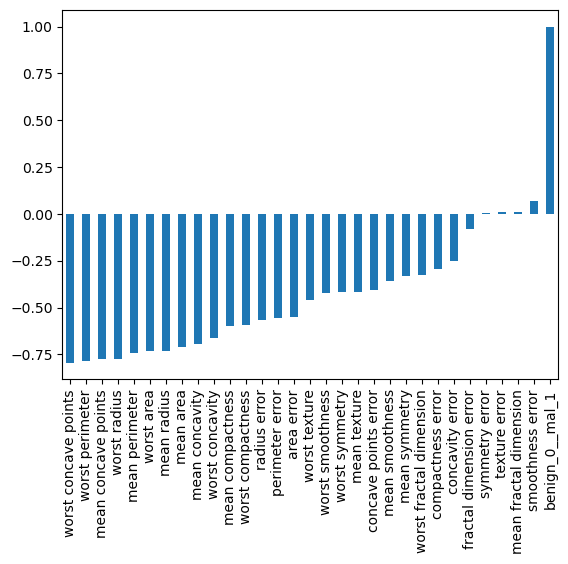

In [11]:
# Plot correlation values as bar chart

df.corr()['benign_0__mal_1'].sort_values().plot(kind='bar');

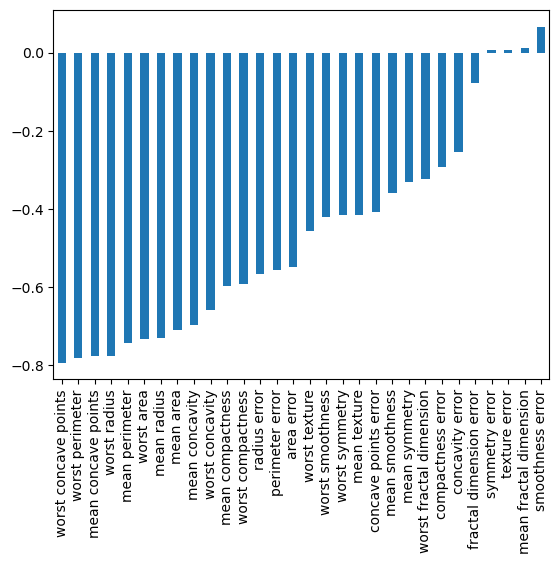

In [12]:
# Remove target variable from list of correlation values for clarity

df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar');

In [ ]:
# All features up to 'area error' show strong negative correlation with target variable - could remove the other features? 
# Either way, there is evidence for good predictive power based on data

## Train Test Split

In [13]:
X = df.drop('benign_0__mal_1',axis=1).values

y = df['benign_0__mal_1'].values

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)


## Scaling Data

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
scaler = MinMaxScaler()

In [18]:
scaler.fit(X_train)

MinMaxScaler()

In [19]:
X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)

In [21]:
X_train.shape

(426, 30)

## Creating the Model

    # For a binary classification problem
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
                  
    

In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout

In [23]:
model = Sequential()

# Input layer (30 features)
model.add(Dense(units=30, activation='relu'))

# Hidden layer (cut neurons in half)
model.add(Dense(units=15, activation='relu'))

# Output layer (one binary output value)
model.add(Dense(units=1, activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

An excellent article for tuning your parameters in ANN can be accessed [here](https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-network). 

## Training the Model 

### Example One: Choosing too many epochs and overfitting the data

[Link](https://stats.stackexchange.com/questions/164876/tradeoff-batch-size-vs-number-of-iterations-to-train-a-neural-network) to documentation on trade-off between batch size and number of epochs.

[Link](https://datascience.stackexchange.com/questions/18414/are-there-any-rules-for-choosing-the-size-of-a-mini-batch) to documentation on rules for choosing batch size.

In [24]:
# Choose high number of epochs to demonstrate 'overfitting'

model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test), verbose=1)

Epoch 1/600
14/14 [==============================] - 1s 16ms/step - loss: 0.6816 - accuracy: 0.5822 - val_loss: 0.6616 - val_accuracy: 0.6503
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6453 - accuracy: 0.7254 - val_loss: 0.6185 - val_accuracy: 0.8601
Epoch 3/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6015 - accuracy: 0.8333 - val_loss: 0.5683 - val_accuracy: 0.8741
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5546 - accuracy: 0.8521 - val_loss: 0.5214 - val_accuracy: 0.8741
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5084 - accuracy: 0.8685 - val_loss: 0.4762 - val_accuracy: 0.8881
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4651 - accuracy: 0.8732 - val_loss: 0.4309 - val_accuracy: 0.9161
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4222 - accuracy: 0.8826 - val_loss: 0.3886 - val_accuracy: 0.9161
Epoch 8/600


Epoch 59/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0616 - accuracy: 0.9836 - val_loss: 0.1061 - val_accuracy: 0.9790
Epoch 60/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0638 - accuracy: 0.9812 - val_loss: 0.1048 - val_accuracy: 0.9790
Epoch 61/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0619 - accuracy: 0.9789 - val_loss: 0.1062 - val_accuracy: 0.9790
Epoch 62/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0633 - accuracy: 0.9812 - val_loss: 0.1056 - val_accuracy: 0.9790
Epoch 63/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0592 - accuracy: 0.9859 - val_loss: 0.1064 - val_accuracy: 0.9790
Epoch 64/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0587 - accuracy: 0.9836 - val_loss: 0.1071 - val_accuracy: 0.9790
Epoch 65/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0583 - accuracy: 0.9836 - val_loss: 0.1082 - val_accuracy: 0.9650
Epoch 

14/14 [==============================] - 0s 4ms/step - loss: 0.0449 - accuracy: 0.9859 - val_loss: 0.1038 - val_accuracy: 0.9790
Epoch 117/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0484 - accuracy: 0.9859 - val_loss: 0.1080 - val_accuracy: 0.9720
Epoch 118/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0451 - accuracy: 0.9859 - val_loss: 0.1048 - val_accuracy: 0.9720
Epoch 119/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0481 - accuracy: 0.9883 - val_loss: 0.1103 - val_accuracy: 0.9650
Epoch 120/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0508 - accuracy: 0.9765 - val_loss: 0.1177 - val_accuracy: 0.9650
Epoch 121/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0470 - accuracy: 0.9883 - val_loss: 0.1110 - val_accuracy: 0.9650
Epoch 122/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0474 - accuracy: 0.9812 - val_loss: 0.1110 - val_accuracy: 0.9650
Epoch 123/600

14/14 [==============================] - 0s 4ms/step - loss: 0.0364 - accuracy: 0.9883 - val_loss: 0.1235 - val_accuracy: 0.9650
Epoch 174/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0381 - accuracy: 0.9859 - val_loss: 0.1189 - val_accuracy: 0.9650
Epoch 175/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0385 - accuracy: 0.9859 - val_loss: 0.1400 - val_accuracy: 0.9441
Epoch 176/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0424 - accuracy: 0.9836 - val_loss: 0.1200 - val_accuracy: 0.9720
Epoch 177/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0347 - accuracy: 0.9859 - val_loss: 0.1273 - val_accuracy: 0.9650
Epoch 178/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0359 - accuracy: 0.9859 - val_loss: 0.1189 - val_accuracy: 0.9720
Epoch 179/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0347 - accuracy: 0.9859 - val_loss: 0.1297 - val_accuracy: 0.9650
Epoch 180/600

14/14 [==============================] - 0s 4ms/step - loss: 0.0291 - accuracy: 0.9859 - val_loss: 0.1282 - val_accuracy: 0.9720
Epoch 231/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0283 - accuracy: 0.9883 - val_loss: 0.1316 - val_accuracy: 0.9720
Epoch 232/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0280 - accuracy: 0.9883 - val_loss: 0.1326 - val_accuracy: 0.9650
Epoch 233/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0285 - accuracy: 0.9883 - val_loss: 0.1376 - val_accuracy: 0.9650
Epoch 234/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0310 - accuracy: 0.9859 - val_loss: 0.1308 - val_accuracy: 0.9650
Epoch 235/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0331 - accuracy: 0.9836 - val_loss: 0.1389 - val_accuracy: 0.9650
Epoch 236/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0284 - accuracy: 0.9883 - val_loss: 0.1267 - val_accuracy: 0.9720
Epoch 237/600

14/14 [==============================] - 0s 4ms/step - loss: 0.0246 - accuracy: 0.9906 - val_loss: 0.1262 - val_accuracy: 0.9720
Epoch 288/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0245 - accuracy: 0.9883 - val_loss: 0.1324 - val_accuracy: 0.9650
Epoch 289/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0250 - accuracy: 0.9906 - val_loss: 0.1464 - val_accuracy: 0.9580
Epoch 290/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0254 - accuracy: 0.9883 - val_loss: 0.1324 - val_accuracy: 0.9650
Epoch 291/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0246 - accuracy: 0.9930 - val_loss: 0.1334 - val_accuracy: 0.9650
Epoch 292/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0227 - accuracy: 0.9930 - val_loss: 0.1340 - val_accuracy: 0.9650
Epoch 293/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0220 - accuracy: 0.9906 - val_loss: 0.1249 - val_accuracy: 0.9720
Epoch 294/600

14/14 [==============================] - 0s 4ms/step - loss: 0.0200 - accuracy: 0.9953 - val_loss: 0.1359 - val_accuracy: 0.9650
Epoch 345/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0183 - accuracy: 0.9930 - val_loss: 0.1342 - val_accuracy: 0.9650
Epoch 346/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0180 - accuracy: 0.9930 - val_loss: 0.1354 - val_accuracy: 0.9650
Epoch 347/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0179 - accuracy: 0.9930 - val_loss: 0.1335 - val_accuracy: 0.9650
Epoch 348/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0199 - accuracy: 0.9930 - val_loss: 0.1310 - val_accuracy: 0.9650
Epoch 349/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0201 - accuracy: 0.9930 - val_loss: 0.1367 - val_accuracy: 0.9650
Epoch 350/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0178 - accuracy: 0.9953 - val_loss: 0.1302 - val_accuracy: 0.9650
Epoch 351/600

14/14 [==============================] - 0s 4ms/step - loss: 0.0265 - accuracy: 0.9789 - val_loss: 0.1606 - val_accuracy: 0.9510
Epoch 402/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0184 - accuracy: 0.9930 - val_loss: 0.1324 - val_accuracy: 0.9650
Epoch 403/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0165 - accuracy: 0.9953 - val_loss: 0.1392 - val_accuracy: 0.9650
Epoch 404/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0148 - accuracy: 0.9953 - val_loss: 0.1392 - val_accuracy: 0.9650
Epoch 405/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0145 - accuracy: 0.9953 - val_loss: 0.1374 - val_accuracy: 0.9650
Epoch 406/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0145 - accuracy: 0.9977 - val_loss: 0.1489 - val_accuracy: 0.9580
Epoch 407/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0142 - accuracy: 0.9953 - val_loss: 0.1372 - val_accuracy: 0.9720
Epoch 408/600

14/14 [==============================] - 0s 4ms/step - loss: 0.0155 - accuracy: 0.9930 - val_loss: 0.1393 - val_accuracy: 0.9720
Epoch 459/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0116 - accuracy: 0.9977 - val_loss: 0.1555 - val_accuracy: 0.9580
Epoch 460/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0121 - accuracy: 0.9953 - val_loss: 0.1507 - val_accuracy: 0.9720
Epoch 461/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0116 - accuracy: 0.9977 - val_loss: 0.1596 - val_accuracy: 0.9580
Epoch 462/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0181 - accuracy: 0.9930 - val_loss: 0.1351 - val_accuracy: 0.9790
Epoch 463/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0193 - accuracy: 0.9883 - val_loss: 0.1956 - val_accuracy: 0.9441
Epoch 464/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0138 - accuracy: 0.9930 - val_loss: 0.1317 - val_accuracy: 0.9790
Epoch 465/600

14/14 [==============================] - 0s 4ms/step - loss: 0.0088 - accuracy: 0.9977 - val_loss: 0.1574 - val_accuracy: 0.9720
Epoch 516/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0088 - accuracy: 0.9977 - val_loss: 0.1681 - val_accuracy: 0.9650
Epoch 517/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0095 - accuracy: 0.9977 - val_loss: 0.1535 - val_accuracy: 0.9720
Epoch 518/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0098 - accuracy: 0.9977 - val_loss: 0.1699 - val_accuracy: 0.9580
Epoch 519/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0090 - accuracy: 0.9977 - val_loss: 0.1620 - val_accuracy: 0.9720
Epoch 520/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0089 - accuracy: 0.9977 - val_loss: 0.1620 - val_accuracy: 0.9650
Epoch 521/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0103 - accuracy: 0.9977 - val_loss: 0.1590 - val_accuracy: 0.9720
Epoch 522/600

14/14 [==============================] - 0s 4ms/step - loss: 0.0072 - accuracy: 1.0000 - val_loss: 0.1662 - val_accuracy: 0.9650
Epoch 573/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0073 - accuracy: 0.9977 - val_loss: 0.1733 - val_accuracy: 0.9650
Epoch 574/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0073 - accuracy: 1.0000 - val_loss: 0.1618 - val_accuracy: 0.9720
Epoch 575/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0072 - accuracy: 0.9977 - val_loss: 0.1712 - val_accuracy: 0.9650
Epoch 576/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0144 - accuracy: 0.9930 - val_loss: 0.1587 - val_accuracy: 0.9790
Epoch 577/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0078 - accuracy: 0.9977 - val_loss: 0.1905 - val_accuracy: 0.9580
Epoch 578/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0088 - accuracy: 0.9977 - val_loss: 0.1594 - val_accuracy: 0.9720
Epoch 579/600

In [25]:
model_losses = pd.DataFrame(model.history.history)

In [26]:
# Loss function values on training set per epoch
# Accuracy scores on training set per epoch
# Loss function values on test set per epoch
# Accuracy scores on the test set per epoch

model_losses

,loss,accuracy,val_loss,val_accuracy
0,0.681569,0.582160,0.661647,0.650350
1,0.645304,0.725352,0.618455,0.860140
2,0.601538,0.833333,0.568270,0.874126
3,0.554586,0.852113,0.521380,0.874126
4,0.508435,0.868545,0.476185,0.888112
...,...,...,...,...
595,0.006592,1.000000,0.177545,0.965035
596,0.006720,1.000000,0.172512,0.965035
597,0.007025,1.000000,0.156874,0.972028
598,0.008886,0.997653,0.187692,0.958042


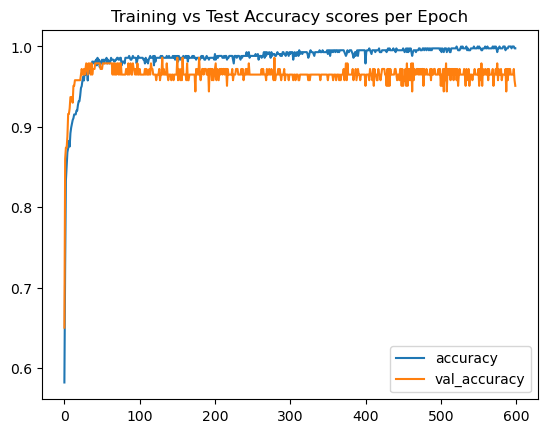

In [31]:
model_losses[['accuracy', 'val_accuracy']].plot()
plt.title("Training vs Test Accuracy scores per Epoch");

In [ ]:
# Accuracy is steady for both training and test sets, in the high 90s, with test scores slightly below training scores

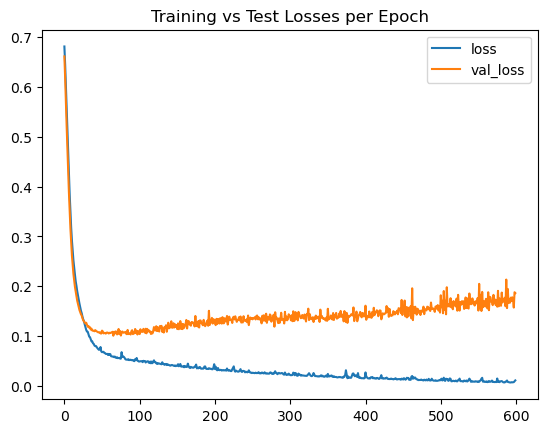

In [33]:
model_losses[['loss', 'val_loss']].plot()
plt.title("Training vs Test Losses per Epoch");

In [ ]:
# As the training losses keep decreasing, the test losses increase from approx. 70 epochs onwards, i.e. 600 epochs is too much
# OVERFITTING!

## Example Two: Early Stopping Callback

We obviously over-trained because we are scoring well on training losses, but not at all well on test losses. We need to know the exact number of epochs to train the model before the test losses start to increase instead of decrease.

Let's use **early stopping** to track the 'val_loss' values, and stop training the model once it begins increasing too much, i.e. probably around 70 epochs.

In [34]:
# Re-compile your model

model = Sequential()

model.add(Dense(units=30,activation='relu'))
model.add(Dense(units=15,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [35]:
from tensorflow.keras.callbacks import EarlyStopping

Stop training the model when a 'monitored' quantity has stopped improving, by defining the following arguments for `EarlyStopping()`:

    Arguments:
        monitor: Quantity to be monitored.
        min_delta: Minimum change in the monitored quantity
            to qualify as an improvement, i.e. an absolute
            change of less than min_delta, will count as no
            improvement.
        patience: Number of epochs with no improvement
            after which training will be stopped.
        verbose: verbosity mode.
        mode: One of `{"auto", "min", "max"}`. In `min` mode,
            training will stop when the quantity
            monitored has stopped decreasing; in `max`
            mode it will stop when the quantity
            monitored has stopped increasing; in `auto`
            mode, the direction is automatically inferred
            from the name of the monitored quantity.

In [36]:
# Stop training when losses have stopped minimizing
# When 25 epochs have passed with no improvement, stop training

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [37]:
# Pass the early_stop variable in 'callbacks' argument (in list format)

model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test), verbose=1, callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 1s 13ms/step - loss: 0.6827 - accuracy: 0.4601 - val_loss: 0.6571 - val_accuracy: 0.8322
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6379 - accuracy: 0.8662 - val_loss: 0.6193 - val_accuracy: 0.8601
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5960 - accuracy: 0.8474 - val_loss: 0.5696 - val_accuracy: 0.8671
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5428 - accuracy: 0.8662 - val_loss: 0.5076 - val_accuracy: 0.8671
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4829 - accuracy: 0.8850 - val_loss: 0.4442 - val_accuracy: 0.9231
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4198 - accuracy: 0.8991 - val_loss: 0.3839 - val_accuracy: 0.9371
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3684 - accuracy: 0.9155 - val_loss: 0.3322 - val_accuracy: 0.9441
Epoch 8/600


Epoch 59/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0596 - accuracy: 0.9812 - val_loss: 0.1097 - val_accuracy: 0.9650
Epoch 60/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0621 - accuracy: 0.9789 - val_loss: 0.1001 - val_accuracy: 0.9860
Epoch 61/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0603 - accuracy: 0.9789 - val_loss: 0.1072 - val_accuracy: 0.9720
Epoch 62/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0591 - accuracy: 0.9812 - val_loss: 0.1032 - val_accuracy: 0.9860
Epoch 63/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0592 - accuracy: 0.9765 - val_loss: 0.1089 - val_accuracy: 0.9720
Epoch 64/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0594 - accuracy: 0.9789 - val_loss: 0.1065 - val_accuracy: 0.9720
Epoch 65/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0590 - accuracy: 0.9836 - val_loss: 0.1076 - val_accuracy: 0.9720
Epoch 

In [ ]:
# See model stops training at 81 epochs

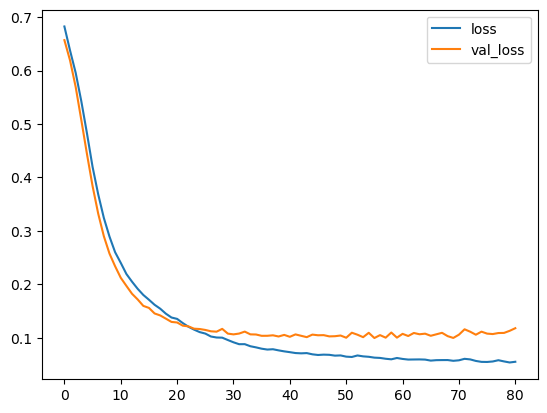

In [40]:
model_losses = pd.DataFrame(model.history.history)

model_losses[['loss', 'val_loss']].plot();

In [ ]:
# As you can see, training stops after 80 epochs
# Even so, the ideal number of epochs is when the two line start to separate - around 30 epochs is sufficient for training

## Example Three: Adding in DropOut Layers

In [41]:
from tensorflow.keras.layers import Dropout

In [44]:
model = Sequential()

# Inner layer
model.add(Dense(units=30, activation='relu'))
model.add(Dropout(0.5))

# Hidden layer
model.add(Dense(units=15, activation='relu'))
model.add(Dropout(0.5))

# Outer layer (no need to turn off any neurons)
model.add(Dense(units=1, activation='sigmoid'))

# Compile model

model.compile(loss='binary_crossentropy', optimizer='adam')

In [45]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test), verbose=1, callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 2s 12ms/step - loss: 0.7008 - val_loss: 0.6850
Epoch 2/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6830 - val_loss: 0.6753
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6714 - val_loss: 0.6621
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6671 - val_loss: 0.6459
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6448 - val_loss: 0.6207
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6229 - val_loss: 0.6009
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6233 - val_loss: 0.5788
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5967 - val_loss: 0.5589
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5674 - val_loss: 0.5361
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5631 - val_loss: 0.5112
Epoch 11

14/14 [==============================] - 0s 4ms/step - loss: 0.1165 - val_loss: 0.0874
Epoch 84/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1081 - val_loss: 0.0999
Epoch 85/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0948 - val_loss: 0.0942
Epoch 86/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0977 - val_loss: 0.0863
Epoch 87/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1058 - val_loss: 0.0922
Epoch 88/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0929 - val_loss: 0.0846
Epoch 89/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1075 - val_loss: 0.0914
Epoch 90/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1071 - val_loss: 0.1078
Epoch 91/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1151 - val_loss: 0.0916
Epoch 92/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1140 - val_loss: 0.0898
Epoch 93/600


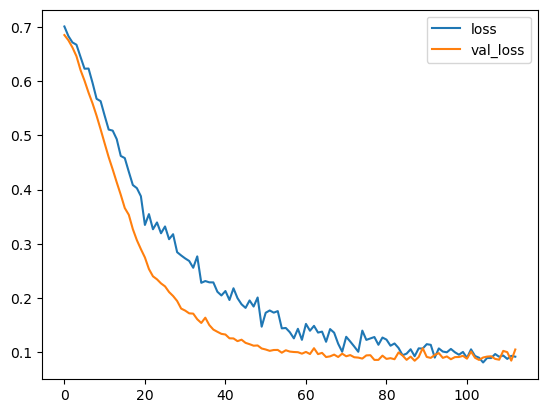

In [46]:
model_loss = pd.DataFrame(model.history.history)

model_loss[['loss', 'val_loss']].plot();

In [ ]:
# Much better! The test losses decrease until approx 113 epochs, along with training losses flattening out at same rate

# Model Evaluation

In [48]:
predictions = model.predict(X_test)

5/5 [==============================] - 0s 1ms/step


In [49]:
# Output class probability predictions rather than binary class predictions - remember that target labels are binary

predictions

array([[9.8980486e-01],
       [9.8619902e-01],
       [9.9434382e-01],
       [7.8759426e-03],
       [9.9860698e-01],
       [9.9912977e-01],
       [9.9954700e-01],
       [2.3148511e-06],
       [9.9793357e-01],
       [9.9738872e-01],
       [1.5262797e-03],
       [9.9538374e-01],
       [9.4673383e-01],
       [9.9923939e-01],
       [1.1374166e-03],
       [9.9923992e-01],
       [9.8471045e-01],
       [9.9905229e-01],
       [7.0002325e-06],
       [4.2605743e-02],
       [9.6783978e-01],
       [9.9753982e-01],
       [9.8722905e-01],
       [9.9880111e-01],
       [3.6886379e-03],
       [8.6929184e-01],
       [3.0385799e-04],
       [9.9988711e-01],
       [3.6417341e-04],
       [3.5597850e-03],
       [1.9895451e-01],
       [1.6160159e-03],
       [4.9575114e-01],
       [1.7269723e-01],
       [9.9874681e-01],
       [9.9959677e-01],
       [1.5191538e-02],
       [2.3652848e-02],
       [2.5470005e-04],
       [5.7388233e-06],
       [4.9434900e-03],
       [9.899644

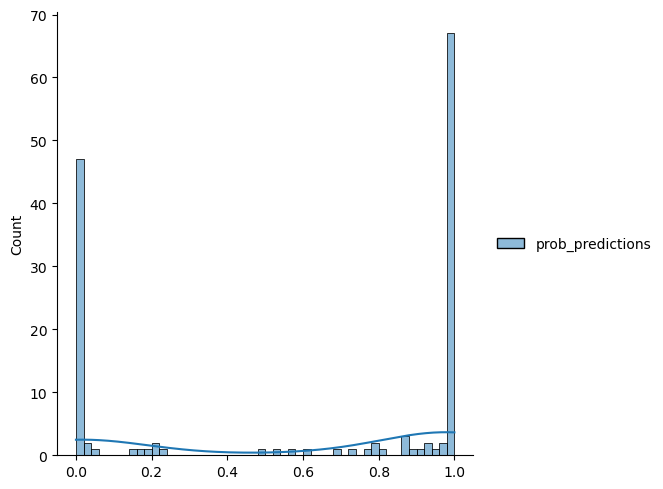

In [63]:
# Plot class probability values to see if there is clear separation

pred_df = pd.DataFrame(predictions, columns=['prob_predictions'])

sns.displot(data=pred_df, bins=50, kde=True);

In [ ]:
# There are some instances around 0.5 probability which are too 'noisy' to predict clearly
# Similar to countplot for the target labels :)

Implement a **threshold** of 0.5 probability to create an array of binary class predictions:

In [50]:
bin_predictions = np.where(predictions > 0.5, 1, 0)

In [51]:
bin_predictions

array([[1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
    

In [64]:
y_test

array([1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0], dtype=int64)

In [52]:
from sklearn.metrics import classification_report, confusion_matrix

In [53]:
print(classification_report(y_test, bin_predictions))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        55
           1       0.99      0.97      0.98        88

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



In [54]:
print(confusion_matrix(y_test, bin_predictions))

[[54  1]
 [ 3 85]]


In [ ]:
# 4 misclassified labels, with 97% accuracy, with good precision and recall - EXCELLENT!!
# Especially good considering the dataset wasn't best balanced